<a href="https://colab.research.google.com/github/rohanvemu/syntheticbiology/blob/main/synthbio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group GOAT, Synthetic Biology Data


### Importing Libraries

In [ ]:
# import required  packages
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats
import pandas as pd
import seaborn as sns
import scipy as sio
import statistics as st

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Setting Up File Import

In [ ]:
#mounting the google drive folder
#do not change PLEASE
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#load spreadsheet of  all the  data 
path="/content/gdrive/Shareddrives/BE310Lab/Synthetic Biology Lab/20210121_Sample_Spec_Data_DO_NOT_USE_FOR_LAB_REPORT-1.xlsx"
OD_data= pd.DataFrame(pd.read_excel(path, sheet_name=0))
Fluorescence_data=pd.DataFrame(pd.read_excel(path, sheet_name=1))

### Calculating Mean OD/Fluorescence for Each Strain from Class Data

In [ ]:
start_s1 = 2 #find starting index corresponding to strain 1
end_s1 = 5
start_s2 = end_s1 #find starting index corresponding to strain 2

mean_s1_OD = []
mean_s2_OD = []

for col in OD_data.columns[1::]: 
  val1 = np.mean(OD_data[col][start_s1:end_s1])
  val2 = np.mean(OD_data[col][start_s2::])
  mean_s1_OD.append(val1)
  mean_s2_OD.append(val2)

In [ ]:
start_s1 = 2
end_s1 = 5
start_s2 = end_s1

mean_s1_fluoro = []
mean_s2_fluoro = []

for col in Fluorescence_data.columns[1::]: 
  val1 = np.mean(Fluorescence_data[col][start_s1:end_s1])
  val2 = np.mean(Fluorescence_data[col][start_s2::])
  mean_s1_fluoro.append(val1)
  mean_s2_fluoro.append(val2)

### Normalizing Fluorescence to Cell Count and Baseline per Strain

In [ ]:
mean_s1_fluoro = np.array(mean_s1_fluoro)
mean_s2_fluoro = np.array(mean_s2_fluoro)
mean_s1_OD = np.array(mean_s1_OD)
mean_s2_OD = np.array(mean_s2_OD)

In [ ]:
fluoro_1 = mean_s1_fluoro - mean_s1_fluoro[-1] #normalization to baseline 
relative_1 = fluoro_1 / mean_s1_OD #normalization to OD
max_fluoro_1 = max(relative_1) 
normalize_1 = relative_1 / max_fluoro_1 #normalization to local max
normalize_1 = np.flip(normalize_1[:-1]) #flip to orient array in increasing AHL
fluoro_2 = mean_s2_fluoro - mean_s2_fluoro[-1]
relative_2 = fluoro_2 / mean_s2_OD
max_fluoro_2 = max(relative_2)
normalize_2 = relative_2 / max_fluoro_2
normalize_2 = np.flip(normalize_2[:-1])

### Exporting Data for MATLAB Model Fitting

In [ ]:
AHL_conc = np.array([1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2])*(10**6) #AHL conc in increasing order
compiled = pd.DataFrame(np.array([AHL_conc, normalize_1, normalize_2])) #compile into a DataFrame 
compiled = compiled.T #transpose data frame so that columns correspond to AHL, S1, and S2
compiled.columns = ['AHL Concentration', 'S1', 'S2']
compiled.to_excel("/content/gdrive/Shareddrives/BE310Lab/Synthetic Biology Lab/straindata.xlsx") #export xlsx into local drive for download

### QC Check of Data Analysis by Plotting Data

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

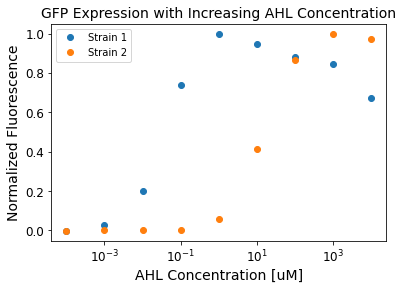

In [ ]:
plt.semilogx(AHL_conc, normalize_1, marker='o', linestyle='none', label = 'Strain 1')
plt.semilogx(AHL_conc, normalize_2, marker='o', linestyle='none', label = 'Strain 2')
plt.xlabel("AHL Concentration [uM]", fontsize=14)
plt.ylabel("Normalized Fluorescence", fontsize=14)
plt.legend()
plt.title("GFP Expression with Increasing AHL Concentration", fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)